In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from datafile_methods.data_processing import load_data
PREDICTION_PATH = '../data/predictions/'

#### Compare train and test errors for different models

In [3]:
errors = {'baseline': [[ 0.99425462,  0.99468217,  0.99438628,  0.99377059,  0.99424295],
  [ 1.00601127,  1.00459408,  1.00499478,  1.00810896,  1.00620091]],
 'mf_als_recommend': [[ 0.88712575,  0.88734776,  0.88697049,  0.88671749,  0.88695225],
  [ 0.99485903,  0.99279848,  0.99421156,  0.99677274,  0.99500636]],
 'mf_svd_sci': [[ 0.94425527,  0.94475345,  0.94450673,  0.94360606,  0.94392763],
  [ 0.99638552,  0.9944817 ,  0.99543418,  0.99831226,  0.99661938]],
 'mf_svd_skl': [[ 0.95359693,  0.9542387 ,  0.95362805,  0.95351571,  0.95366641],
  [ 0.99593991,  0.99455596,  0.99519758,  0.9983749 ,  0.9965133 ]],
 'slope_one': [[ 0.93905529,  0.93943099,  0.93922088,  0.93864486,  0.93895883],
  [ 1.00153839,  1.00012637,  1.00086173,  1.003991  ,  1.00150891]],
 'co_clustering': [[ 0.97690452,  0.97837862,  0.9773867 ,  0.97755343,  0.97704166],
  [ 1.00326364,  1.00164185,  1.00312846,  1.005973  ,  1.0037095 ]],
 'knn_baseline_i': [[ 0.94654128,  0.94697197,  0.94658684,  0.94601615,  0.94647668],
  [ 0.99630403,  0.99446918,  0.99561056,  0.99819283,  0.99635748]],
 'knn_baseline_u': [[ 0.95829473,  0.95866049,  0.95840947,  0.95780609,  0.95822906],
  [ 0.99762091,  0.99615513,  0.99711687,  0.99980506,  0.99795458]],
 'nmf': [[ 0.98747149,  0.98797977,  0.98768374,  0.98707014,  0.98764229],
  [ 0.99998649,  0.99855507,  0.99939229,  1.00186393,  1.00029995]],
 'sur_svd': [[ 0.785207  ,  0.78505567,  0.78511465,  0.78539203,  0.78555635],
  [ 0.99009985,  0.98788137,  0.98995628,  0.99210459,  0.99018139]]}

train_errors = pd.DataFrame({model: m_errors[0] for model, m_errors in errors.items()})
test_errors = pd.DataFrame({model: m_errors[1] for model, m_errors in errors.items()})

In [35]:
errors_sk = {'03': [[ 0.98001665,  0.97985069,  0.98011265,  0.97945982,  0.97966539],
  [ 0.99923999,  0.9972677 ,  0.99823564,  1.00146609,  0.999349  ]],
 '05': [[ 0.97270177,  0.97316066,  0.97280212,  0.97244631,  0.97279004],
  [ 0.99730966,  0.99560469,  0.99633474,  0.99971287,  0.99784341]],
 '07': [[ 0.96661141,  0.96709094,  0.96656901,  0.9659833 ,  0.96651002],
  [ 0.99653633,  0.99485127,  0.99571837,  0.99869003,  0.99693379]],
 '09': [[ 0.96107037,  0.96151796,  0.96085401,  0.96044072,  0.96094869],
  [ 0.99617666,  0.99455558,  0.9953452 ,  0.99836964,  0.99664907]],
 '11': [[ 0.95604677,  0.95671483,  0.95622853,  0.95573096,  0.95595154],
  [ 0.9960356 ,  0.99456342,  0.99521   ,  0.99828111,  0.99641878]],
 '13': [[ 0.95135528,  0.95187106,  0.95149846,  0.95078682,  0.95116699],
  [ 0.99601761,  0.99452242,  0.99532679,  0.99829138,  0.996563  ]],
 '15': [[ 0.94647522,  0.94696212,  0.94695092,  0.94598458,  0.94635388],
  [ 0.99623038,  0.99448332,  0.99528858,  0.99827728,  0.99653665]],
 '17': [[ 0.94174489,  0.94230624,  0.94209997,  0.94109883,  0.9415669 ],
  [ 0.99616458,  0.99450593,  0.99555218,  0.99837099,  0.9966911 ]],
 '19': [[ 0.93718039,  0.9376148 ,  0.93718619,  0.93632814,  0.93687514],
  [ 0.99646358,  0.99497431,  0.9956576 ,  0.99868282,  0.99681424]],
 '21': [[ 0.93249385,  0.93294613,  0.93259075,  0.93178372,  0.93243883],
  [ 0.9965766 ,  0.99521838,  0.99584397,  0.99883607,  0.99702822]],
 '23': [[ 0.92788798,  0.92844659,  0.92789341,  0.92724524,  0.92781303],
  [ 0.99691046,  0.995448  ,  0.99614639,  0.99893696,  0.9971638 ]],
 '25': [[ 0.92369004,  0.92395166,  0.92351934,  0.92289914,  0.92362244],
  [ 0.99712973,  0.99573706,  0.99627893,  0.99923287,  0.99743282]],
 '27': [[ 0.91931121,  0.91954482,  0.91930111,  0.91870567,  0.91943166],
  [ 0.99744232,  0.9958687 ,  0.99643206,  0.99944247,  0.99761095]],
 '29': [[ 0.91519414,  0.91555719,  0.91510107,  0.91447906,  0.91547329],
  [ 0.99757305,  0.99612985,  0.99648569,  0.99968696,  0.99792266]],
 '35': [[ 0.90291524,  0.90347941,  0.90299347,  0.90213266,  0.90285086],
  [ 0.99830211,  0.99687539,  0.99718277,  1.00044685,  0.99856132]]}
errors = errors_sk

In [36]:
train_errors = pd.DataFrame({model: m_errors[0] for model, m_errors in errors.items()})
test_errors = pd.DataFrame({model: m_errors[1] for model, m_errors in errors.items()})

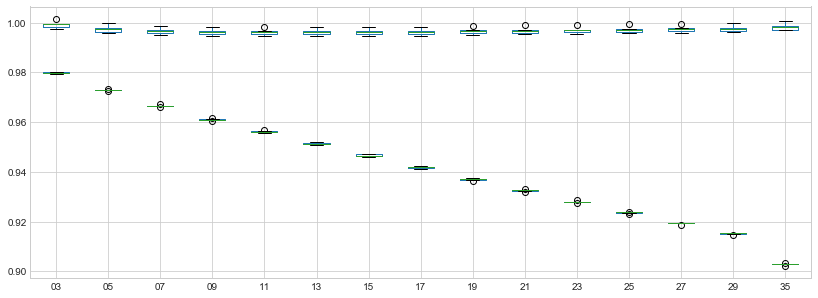

In [37]:
plt.figure(figsize=(14,5))
train_errors.boxplot()
test_errors.boxplot()

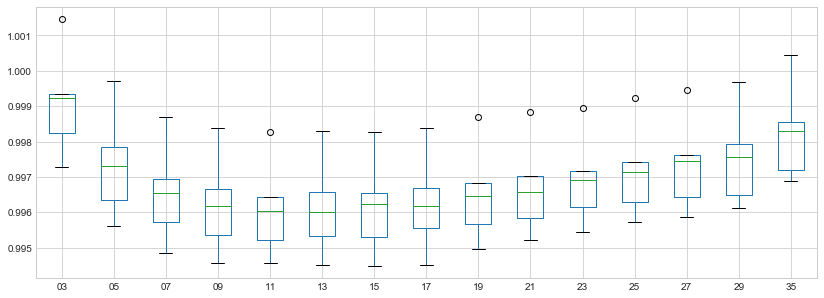

In [38]:
plt.figure(figsize=(14,5))
test_errors.boxplot()

#### Compare submission files

In [ ]:
models = list(errors.keys())
n_models = len(models)

fn_sub = [load_data('{}model_{}_sub.csv'.format(PREDICTION_PATH, e))
         for e in models]

In [ ]:
nonzero = fn_sub[0].count_nonzero()

diff_mean = np.zeros((n_models, n_models))
diff_max = np.zeros((n_models, n_models))
diff_min = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(n_models):
        diff_mean[i,j] = abs(fn_sub[i] - fn_sub[j]).sum() / nonzero
        diff_max[i,j] = abs(fn_sub[i] - fn_sub[j]).max()
        diff_min[i,j] = abs(fn_sub[i] - fn_sub[j]).min()

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.heatmap(diff_mean, square=True, xticklabels=models, yticklabels=models)
plt.title('Mean difference')
plt.subplot(122)
sns.heatmap(diff_max, square=True, xticklabels=models, yticklabels=models)
plt.title('Max difference')
plt.show()